In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [19]:
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)

In [20]:
df[['height', 'weight', 'overweight']].head()

,height,weight,overweight
0,168,62.0,0
1,156,85.0,1
2,165,64.0,0
3,169,82.0,1
4,156,56.0,0


In [21]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

In [22]:
df[['cholesterol', 'gluc']].head()

,cholesterol,gluc
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


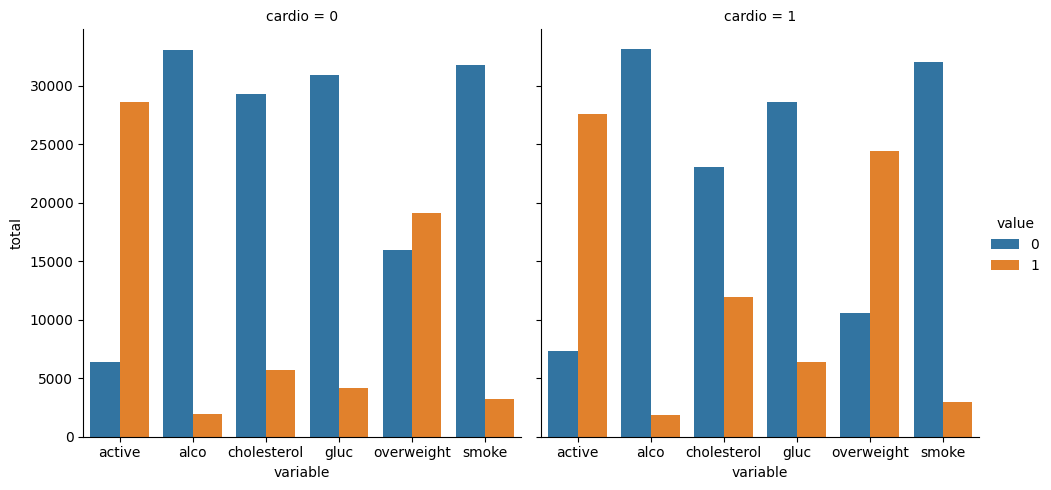

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'], 
                     value_vars=['active', 'alco', 'cholesterol', 'gluc', 
                                 'overweight', 'smoke'])

    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    g = sns.catplot(x="variable", y="total", hue="value", col="cardio",
                    data=df_cat, kind="bar")

    fig = g.fig
    return fig

draw_cat_plot()
plt.show()


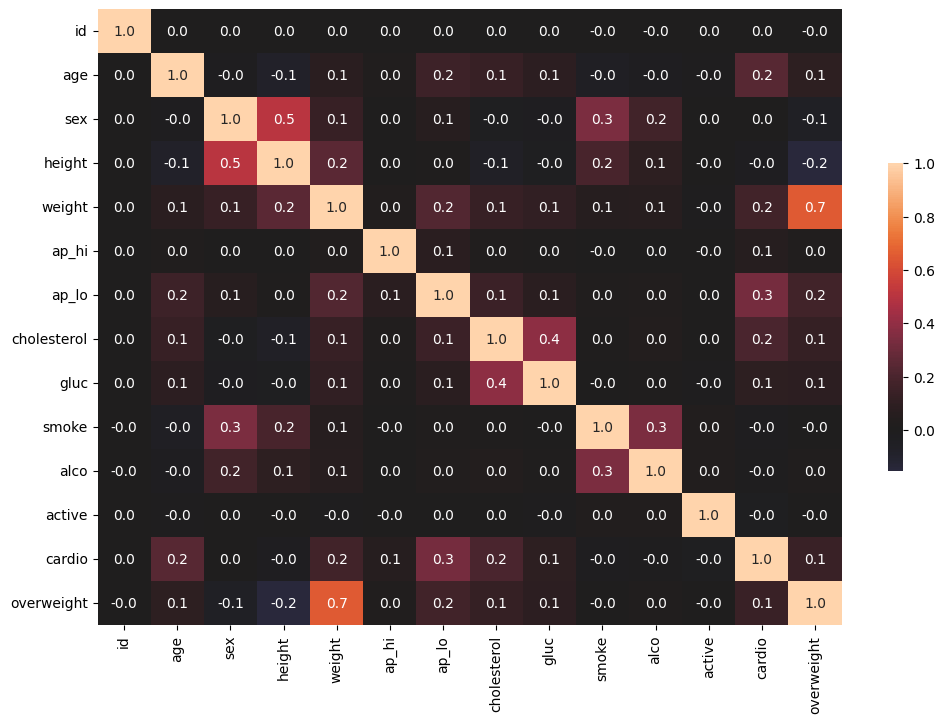

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def draw_heat_map():
    df_heat = df[df['ap_lo'] <= df['ap_hi']]

    df_heat = df_heat[df_heat['height'].between(df_heat['height'].quantile(0.025),
                                                df_heat['height'].quantile(0.975))]

    df_heat = df_heat[df_heat['weight'].between(df_heat['weight'].quantile(0.025),
                                                df_heat['weight'].quantile(0.975))]

    corr = df_heat.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(12, 8))

    sns.heatmap(
        corr,        
        annot=True,       
        fmt=".1f",       
        center=0,         
        cbar_kws={'shrink': .5} 
    )

    return fig

# Run and show the heatmap
draw_heat_map()
plt.show()
